# Instructions

Below are the instructions for the technical assessment. There are two parts: Data Science and Engineering. You should plan to spend about 1-2 hours on the Data Science portion and 1-2 hours on the engineering portion. If you are interviewing for a Data Science position, you may work on the Data Science portion only. 

If you decide to work on the Data Science portion only, you will have more time for analysis and model development. Howvever, also prepare your Data Science outputs as if you will be doing a code hand-off to an engineering partner. Set aside a bit of time to focus on code quality and readability.  Additionally, look at the instructions of the Engineering portion and be prepared to discuss how you would expect this to be implemented in production. 

## Data Science

Create a Probability-of-Cancellation model. Your work won't be assessed on whether you get the best model, but that you understand important concepts behind analyzing the data, feature engineering and model development and evaluation. Keep this section simple, clear and illustrative of your understanding of how to prototype a model.

## Engineering

Productionize your code. Break up your code into modular components and tasks that can be tested independently, but would run as pipeline(s) in production. The tasks should broadly cover the following tasks:
* Preprocessing
  * This will be based off the raw data received at the beginning of DS assignment
* Model Training & Evaluation
* Predictions

# Interview Preparation

Please time-box this project to 3-4 hours; please prioritize the areas that will help you achieve the key outputs to ensure you complete the work within this amount of time. Make notes of areas you would improve on the next iteration. Be ready to discuss the following (bonus if you can implement these into your pipelines):

* When should the model be retrained?
* How many pipelines would you have? Would they run independently?
* Should the prediction pipeline use the latest model?
  * What does model promotion look like?
* Where should the model artifacts be stored?
* Can your pipelines be run by both humans and machines?

Organize the files in a folder structure that would emulate how you would organize the code in a Github repo. Zip up all files and send them back to the recruiter by the morning of your interview. 

# Data Science Portion

## Imports

In [1]:
from random import Random

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

## Dataset

The dataset in this notebook is representive of Vacasa's internal data.

In this notebook, we would like you to develop a model to predict whether a reservation will cancel and describe what the model learned. 

* The label in the dataset is given as `is_canceled`.
* For a complete description of dataset, visit the link: https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [2]:
df = pd.read_csv('../data/raw/hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [36]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [31]:
# Add arrival date into dataframe

In [19]:
import datetime
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_date'] = df.apply(
    lambda x: datetime.date(
        int(x['arrival_date_year']), 
        month_mapping[x['arrival_date_month']], 
        int(x['arrival_date_day_of_month'])
    ), axis=1)

 ## Helpful EDA

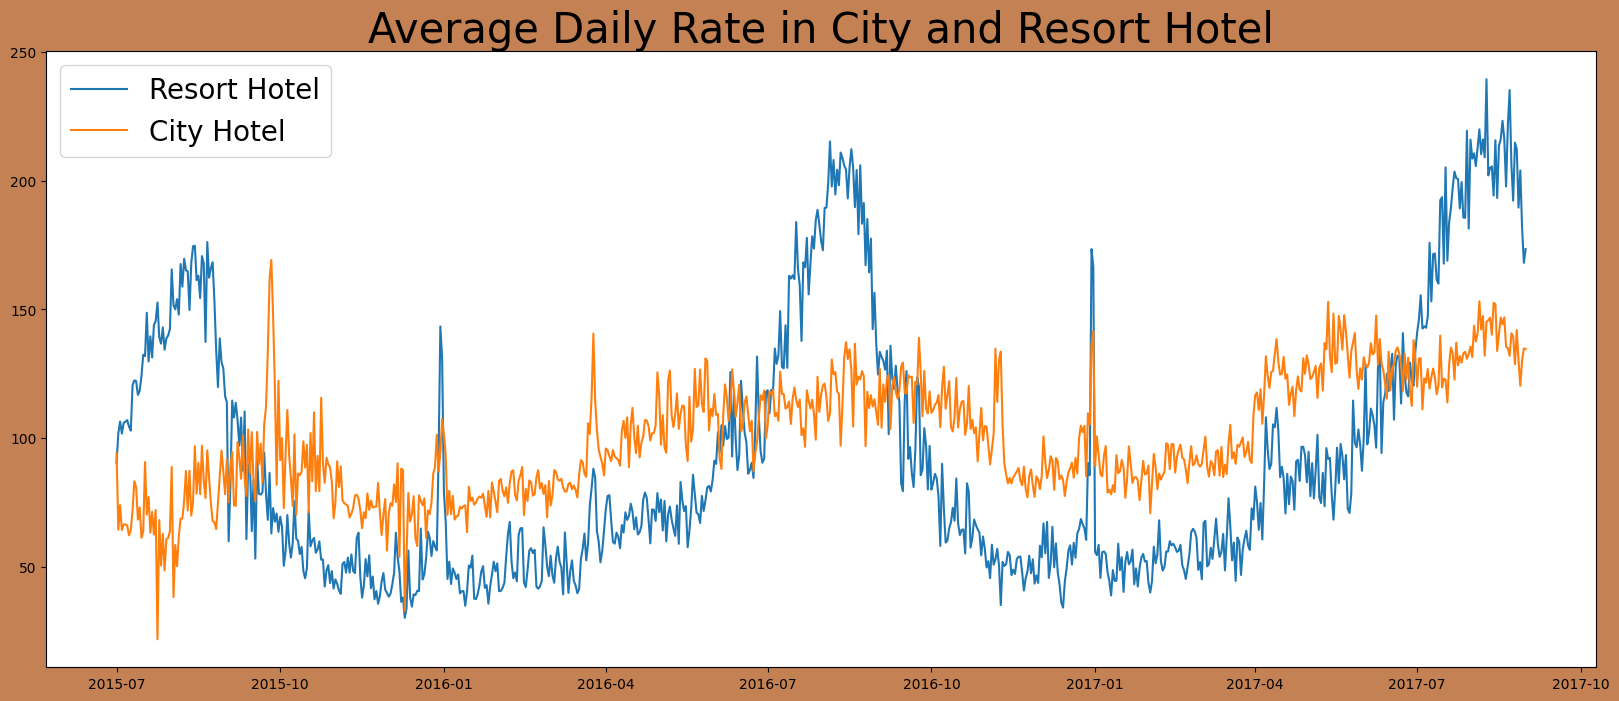

In [33]:
City_Hotel = df[(df['hotel']== 'City Hotel')]
resort_hotel= df[df['hotel']=='Resort Hotel']

resort_hotel = resort_hotel.groupby('arrival_date')[['adr']].mean()
City_Hotel = City_Hotel.groupby('arrival_date')[['adr']].mean()


plt.figure(figsize=(20,8), facecolor='#C38154')
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(City_Hotel.index,City_Hotel['adr'],label = 'City Hotel')
plt.legend(fontsize=20)
plt.show()

We can see clear sesonality with the average prices especially for resort hotel 

In [283]:
df['is_canceled'].mean()

np.float64(0.37041628277075134)

In [285]:
# check for null values

In [37]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


## Deal with missing values

In [42]:
# Based on the description, if the agent is nan, the booking did not come from the travel agency and same with the company. Therefore we can fill these values with 0s (as we dont have 0 index in the dataset)   
df[['agent', 'company', 'children']] = df[['agent', 'company', 'children']].fillna(0)

# For country fill missing values with "Unknown"
df['country'] = df['country'].fillna('Unknown')


In [43]:
# based on the dataset description, columns "agent" and "company" suppose to represent IDs of the booking agent and the company/entity that made the booking, therefore we convert the type to object so that we do not treat these columns as numeric for the analysis
df[['agent', 'company']] = df[['agent', 'company']].astype('object')

In the dataset, we see that adults, children and babies are 0s at the same time sometimes, which is strange, we might decide whether to drop these lines or not based on the investigation and usefullness of these rows

In [289]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
display(df[filter])
df = df[~filter]
df.reset_index(drop=True, inplace=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


## Data preprocessing

## Explore numerical values and its correlations with is_cancelled

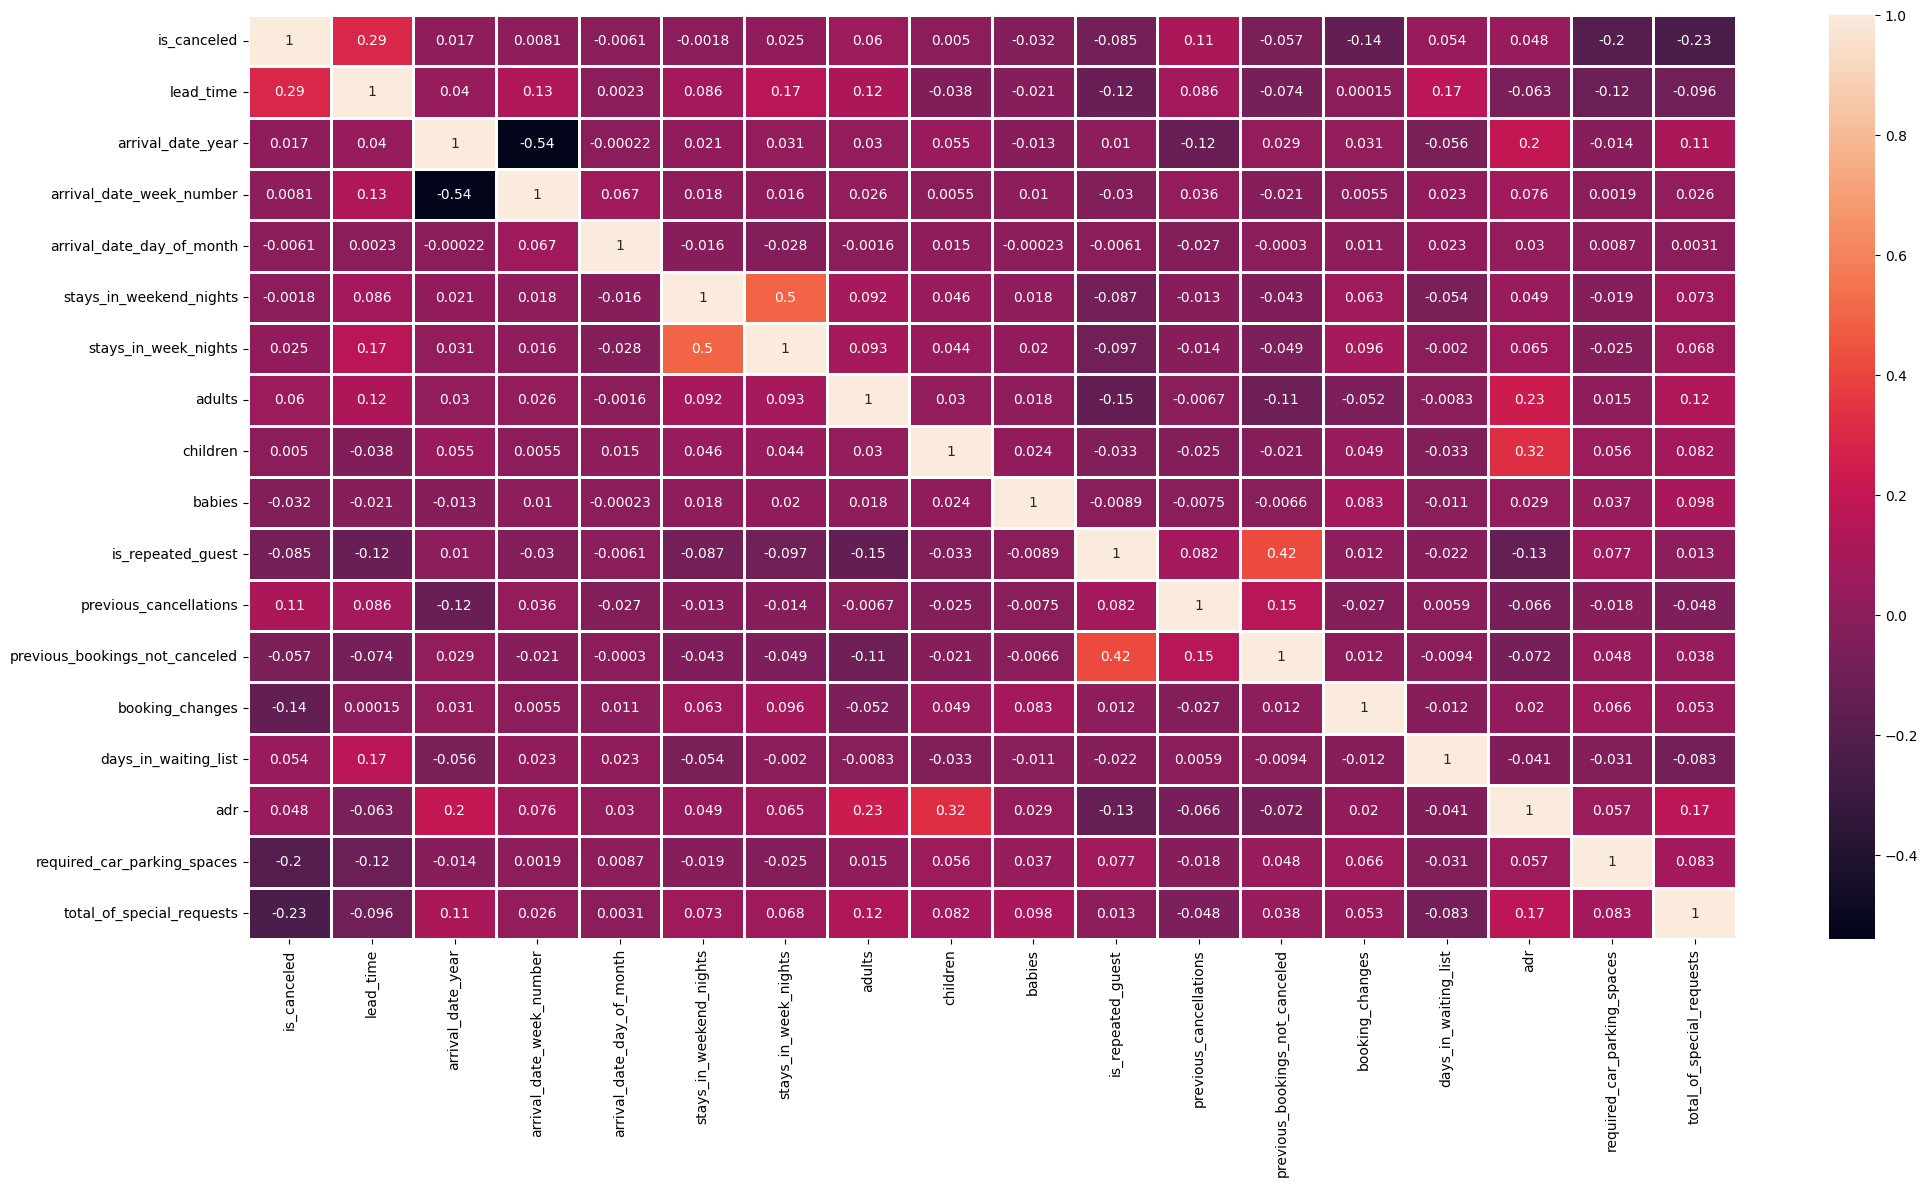

In [44]:
plt.figure(figsize = (24, 12))

numerical_df = df.select_dtypes(include=[np.number])
corr = numerical_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [45]:
correlation = numerical_df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

# Insights:
- most correlated features with is_cancelled are lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes, previous_cancellations. 
- The longer lead_time to the stay, the longer time there is to cancel
- the more special requests, the less likely the reservation is to be canceled
- Previous cancellation might indicate future cancellation as well. 
- Stays in weekend nights and stays in week nights are mutually correlated, so we use only one of these features   


In [293]:
# numerical values to use for the model
numerical_features = [
    'lead_time', 
    'total_of_special_requests', 
    'required_car_parking_spaces', 
    'booking_changes', 
    'previous_cancellations', 
    'is_repeated_guest', 
    'previous_bookings_not_canceled', 
    'adr', 
    'agent', 
    'stays_in_week_nights'
]

In [294]:
def plot_cancellation_per_category(category_column: str, minimal_category_count: int):
    category_counts = df[category_column].value_counts()
    categories = category_counts[category_counts > minimal_category_count]

    # group by these agents and get percentage mean of cancelations

    df_subset_categories = df[df[category_column].isin(categories.index)]
    categories_grouped = df_subset_categories.groupby(category_column).is_canceled.mean().sort_values(ascending = False)

    # plot bar plot for the groupby for the is_cancelled column
    plt.figure(figsize = (12, 6))
    categories_grouped.plot(kind = 'bar')
    plt.title(f'{category_column} and their cancellation rates')
    plt.show()

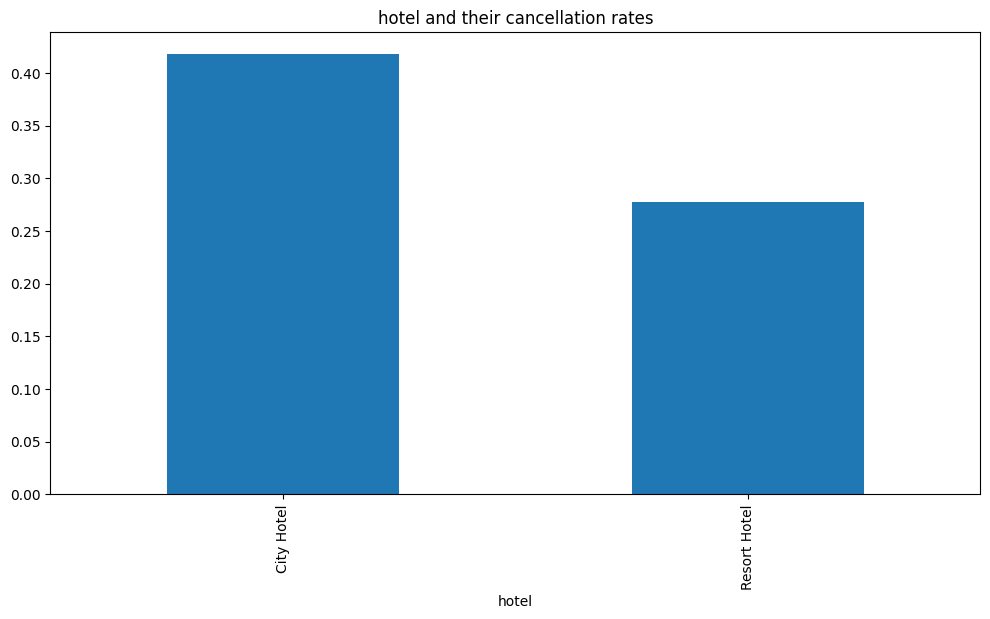

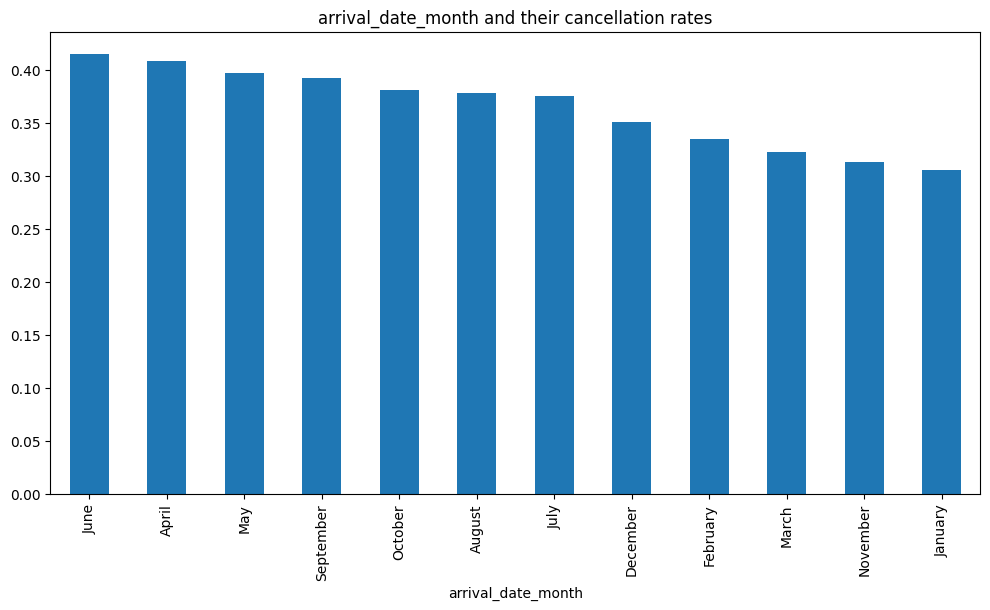

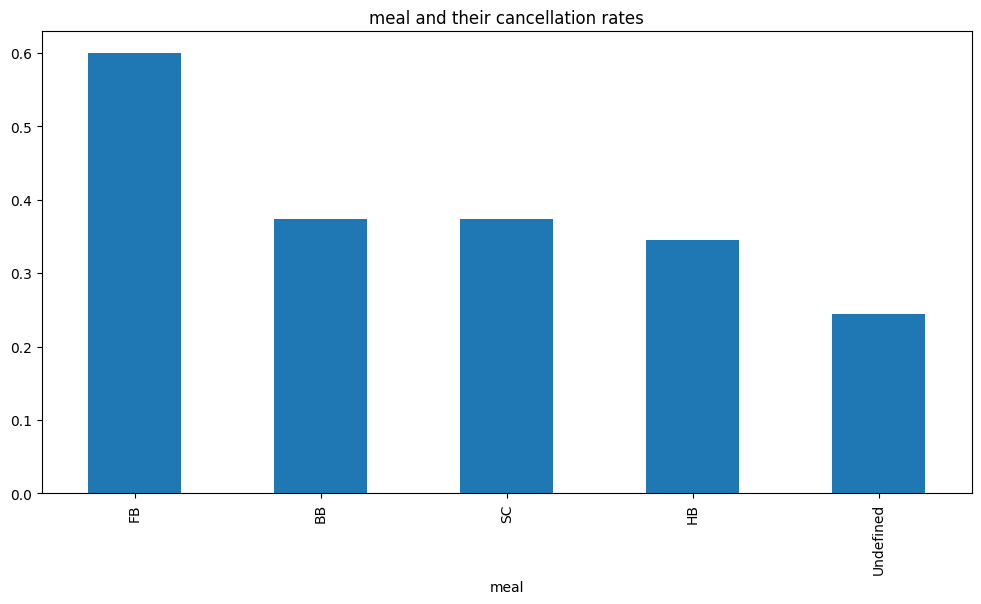

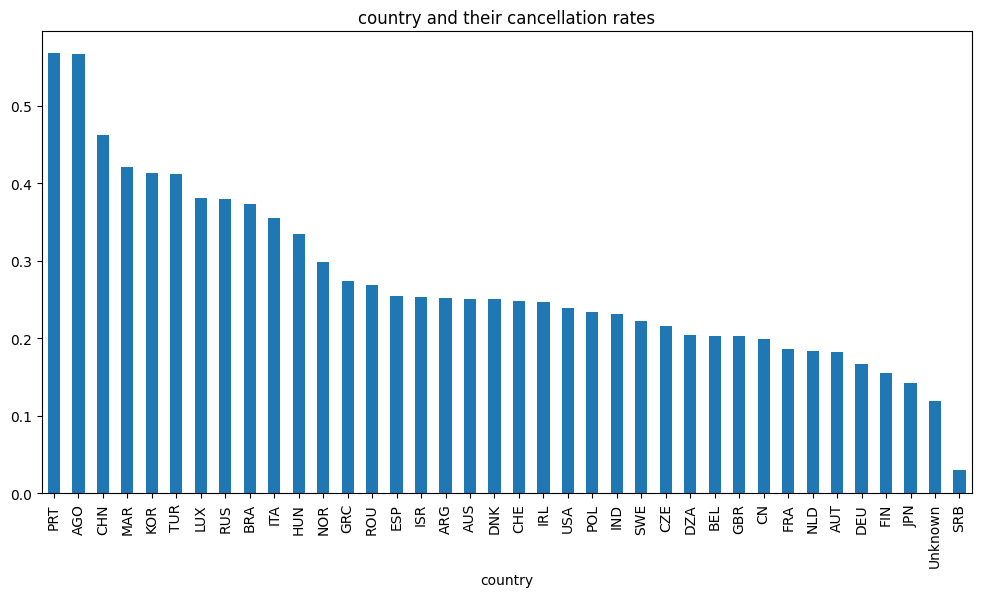

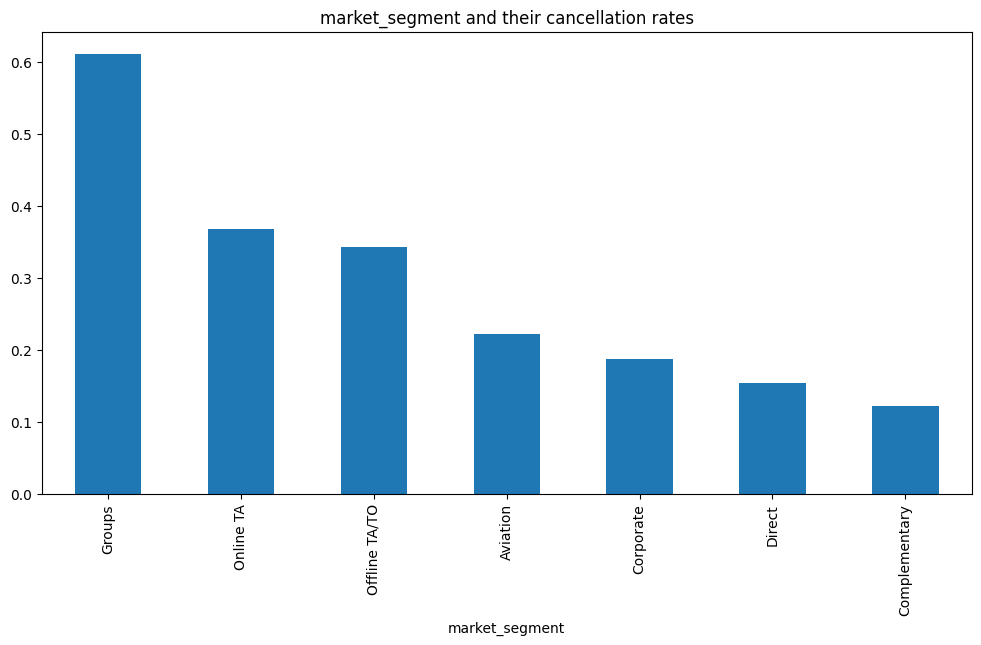

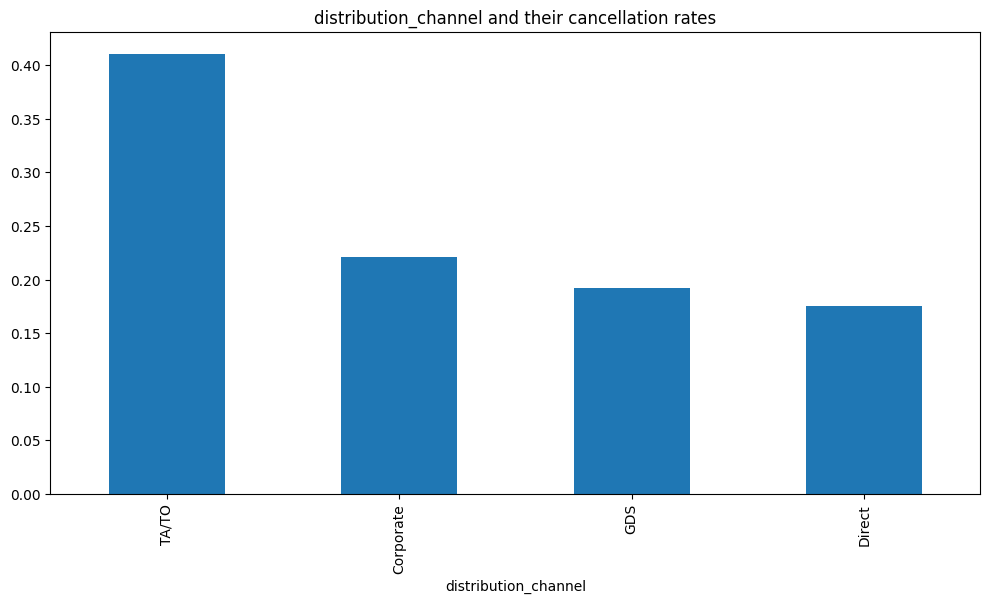

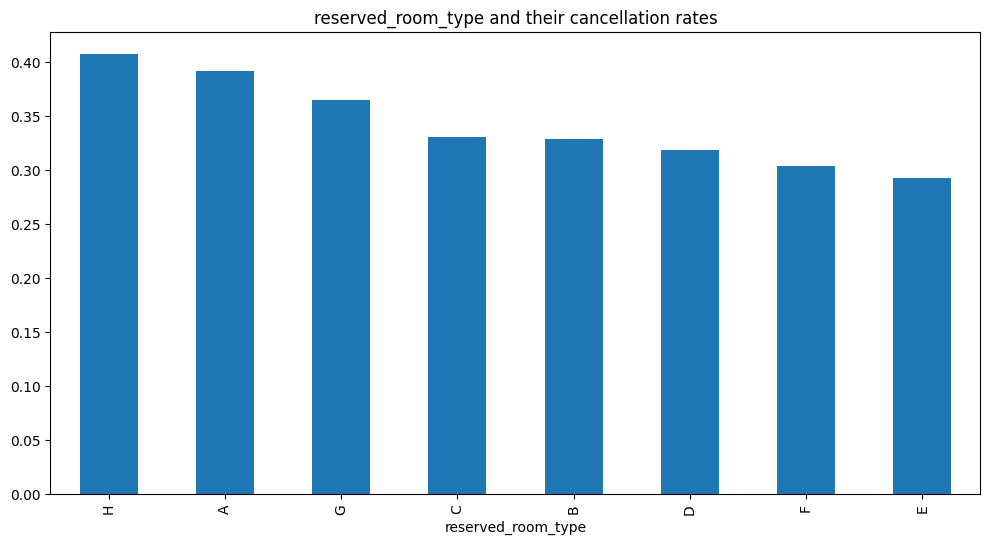

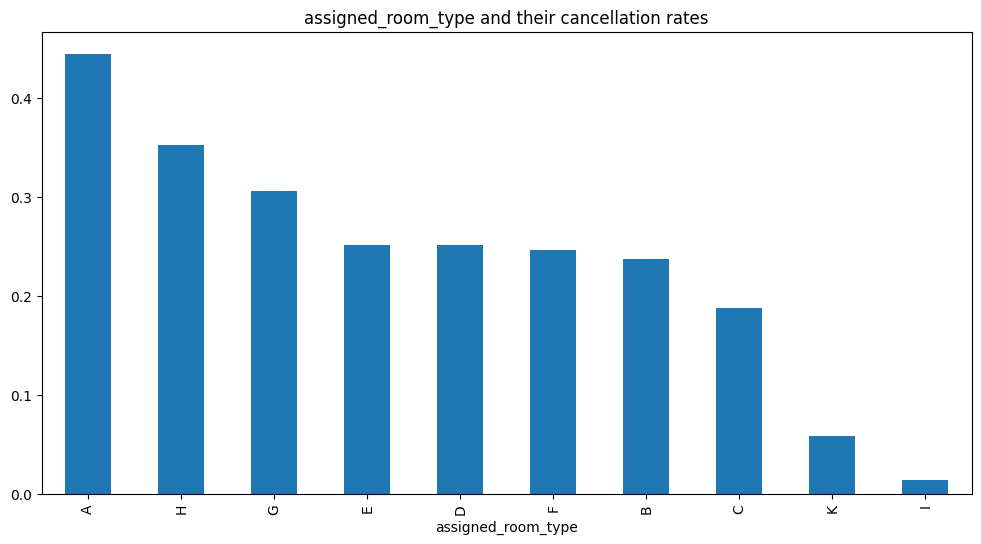

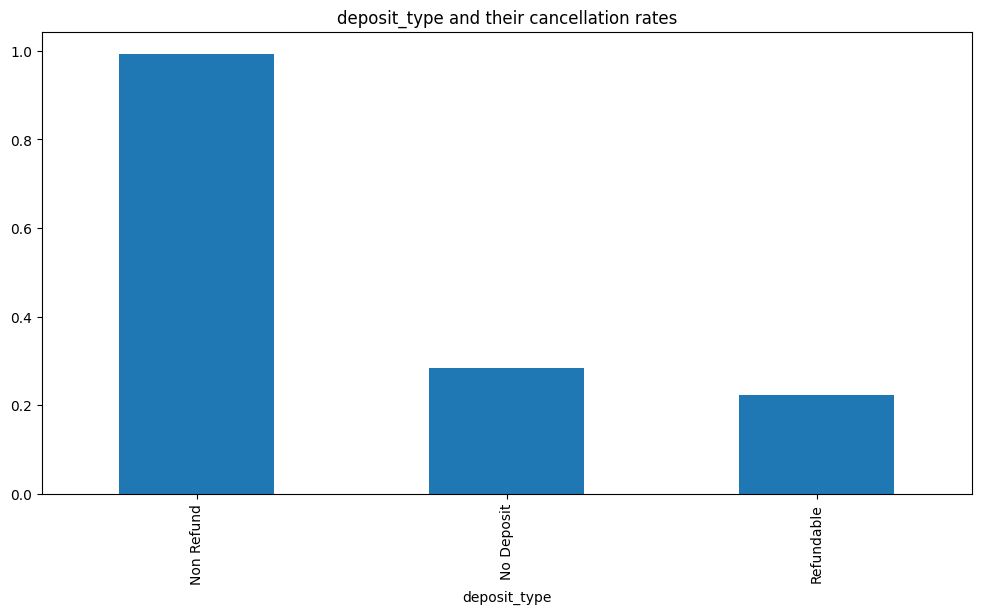

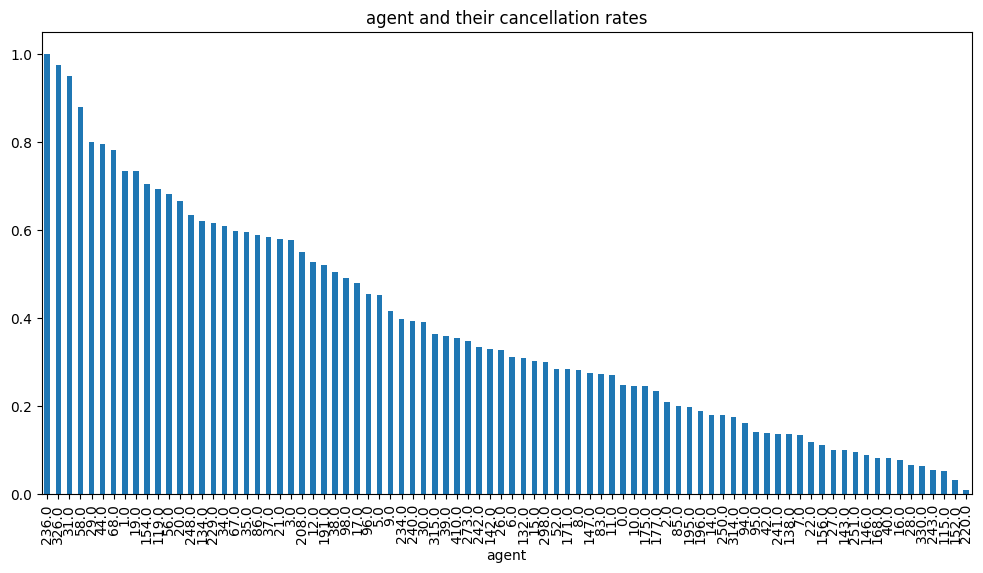

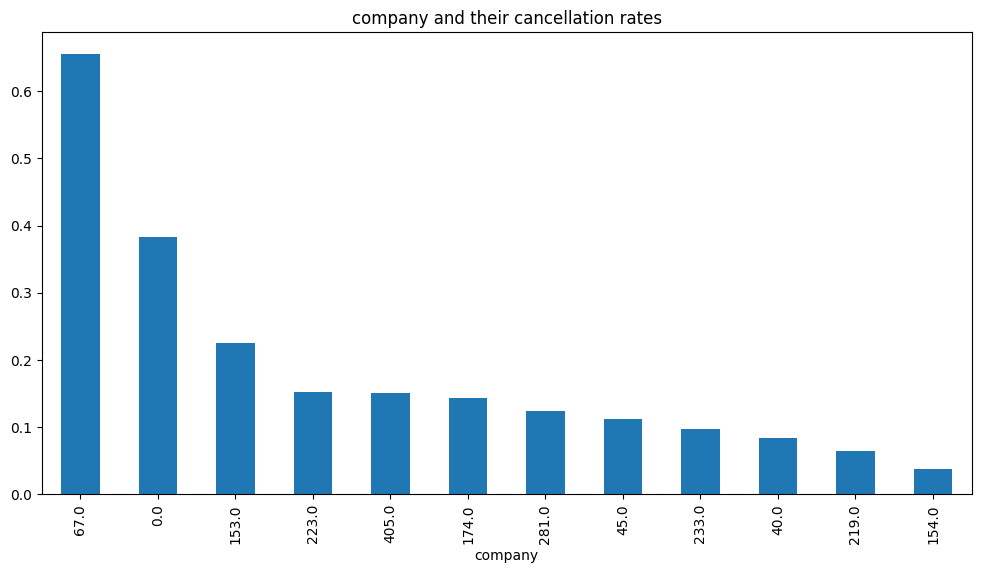

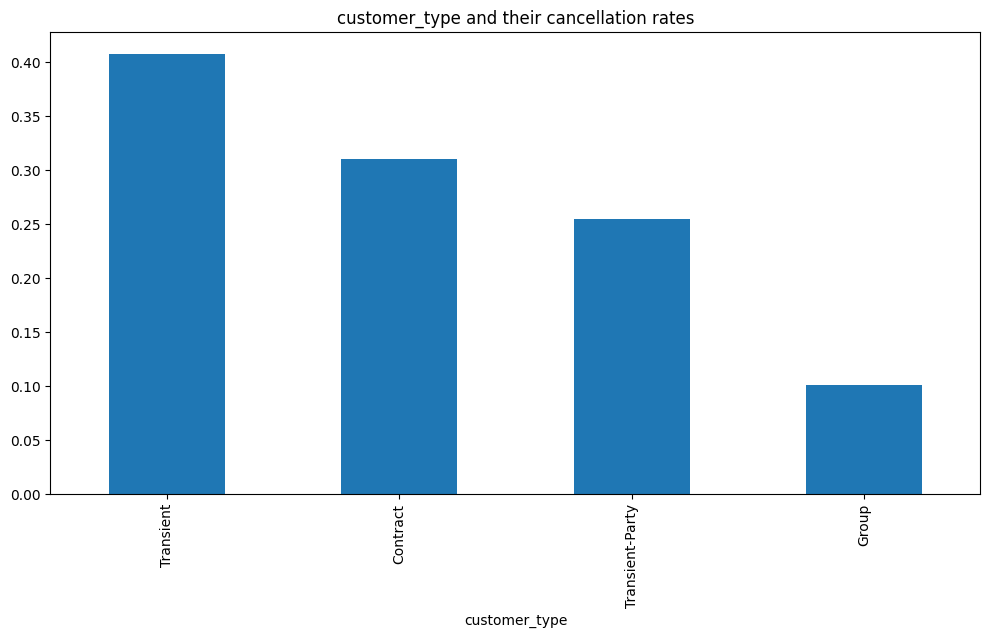

In [296]:
excluded_columns = ['reservation_status', 'reservation_status_date']
columns = [c for c in df.select_dtypes(include = 'object').columns if c not in excluded_columns]
for col in columns:
    plot_cancellation_per_category(col, 100)

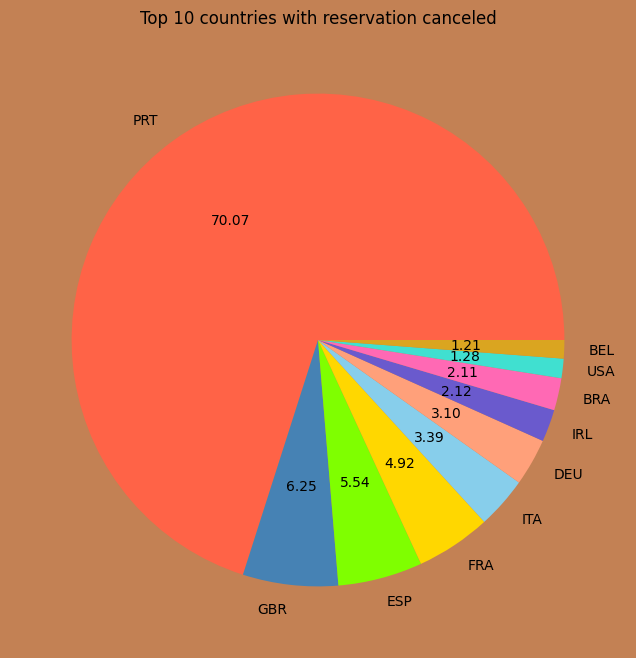

In [47]:
cancelled_data= df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]


# Custom colors for the pie chart
custom_colors = ['#FF6347', '#4682B4', '#7FFF00', '#FFD700', '#87CEEB', '#FFA07A', '#6A5ACD', '#FF69B4', '#40E0D0', '#DAA520']

plt.figure(figsize=(8, 8), facecolor='#C38154')  # Set background color to a light brown
plt.title('Top 10 countries with reservation canceled', color="black")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index, colors=custom_colors)
plt.show()

Insights:
- City hotels have a higher cancellation rate than resort hotels
- Spring months have higher cancellation rates, on the opposite, January has the lowest (might be because of cheaper prices or special offeres in January)
- Full board has the highest cancellation rate
- Groups have the highest cancellation rate
- Countries cancellation rate varies, so we remove them from the model prediction as we have a lot of countries and the model wouldnt be generic -> we might want to go back and investigate especially Portugal, for which we have the most data and it has the highest cancellation rate. 
- *strangest results are for the "deposit_type" for which we have 99 % of cancellations for Non Refund type. This makes no sense, so we should investigate why we have this results -> for now we remove it from the analysis.
- We might want to investigate further the relationship between assigned_room_type and reserved_room_type. Especially with assigned room types with higher numbers than requested room types, we might expect lower cancellation rates (as we see for assigned rooms for K and I)   
- We see big variation in "agent" and "company" features. This might be investigated futher, but for the sake of simplicity of this task, lets just company if the booking was made by a company or not 

In [297]:
# For the model prediction, we use these category columns
categorical_features = [
    'hotel', 
    'arrival_date_month', 
    'meal', 
    'market_segment', 
    'distribution_channel', 
    'reserved_room_type',
    'reserved_room_type', 
    'customer_type'
]

For `agent` and `company` feature instead of adding all values into the model, lets only distinguished if the booking was done by agent or a company 

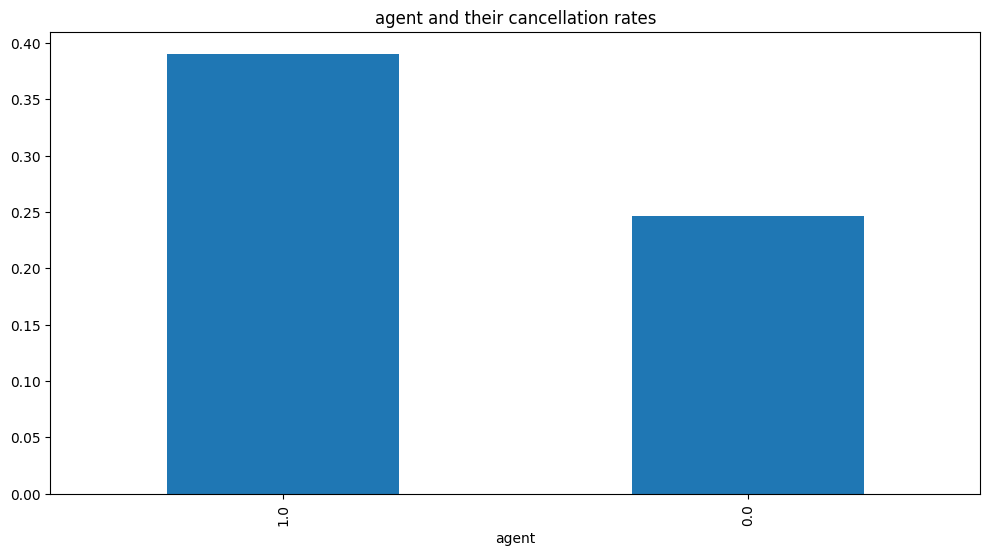

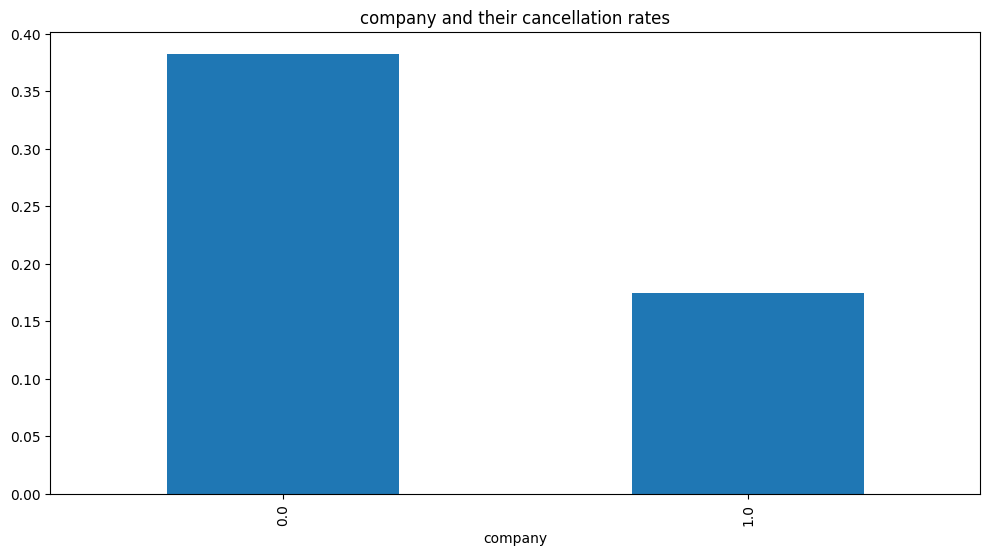

In [298]:
# assign each value in column agent that is greater than 0 to 1
df.loc[df['agent'] > 0, 'agent'] = 1
df.loc[df['company'] > 0, 'company'] = 1

plot_cancellation_per_category('agent', 100)
plot_cancellation_per_category('company', 100)

In [299]:
# we see differences here, so lets add the features into numerical values
numerical_features.extend(['agent', 'company'])

In [300]:
# Separate features and predicted value
features = numerical_features + categorical_features
df_categorical = df[categorical_features]
df_numerical = df[numerical_features]
y = df['is_canceled']

In [301]:
# convert each categorical column in df_categorical into one-hot-encoging column
df_categorical_dummies = pd.get_dummies(df_categorical).astype(int)


In [302]:
df_numerical.isnull().sum()

lead_time                         0
total_of_special_requests         0
required_car_parking_spaces       0
booking_changes                   0
previous_cancellations            0
is_repeated_guest                 0
previous_bookings_not_canceled    0
adr                               0
agent                             0
stays_in_week_nights              0
agent                             0
company                           0
dtype: int64

### Baseline model

We use Logistic Regression as a simple baseline. For this model, we need to scale numerical features

In [307]:
from sklearn.preprocessing import StandardScaler
X_numerical = StandardScaler().fit_transform(df_numerical)

X = pd.concat([pd.DataFrame(X_numerical, columns = df_numerical.columns), df_categorical_dummies], axis = 1)
X.head()

,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,previous_bookings_not_canceled,adr,agent,stays_in_week_nights,...,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,2.225879,-0.720802,-0.254947,4.355824,-0.103195,-0.180343,-0.09151,-2.021841,-2.514455,-1.317378,...,0,0,0,0,0,0,0,0,1,0
1,5.921785,-0.720802,-0.254947,5.921990,-0.103195,-0.180343,-0.09151,-2.021841,-2.514455,-1.317378,...,0,0,0,0,0,0,0,0,1,0
2,-0.908624,-0.720802,-0.254947,-0.342675,-0.103195,-0.180343,-0.09151,-0.534742,-2.514455,-0.790257,...,0,0,0,0,0,0,0,0,1,0
3,-0.852484,-0.720802,-0.254947,-0.342675,-0.103195,-0.180343,-0.09151,-0.534742,0.397701,-0.790257,...,0,0,0,0,0,0,0,0,1,0
4,-0.843127,0.540435,-0.254947,-0.342675,-0.103195,-0.180343,-0.09151,-0.078699,0.397701,-0.263136,...,0,0,0,0,0,0,0,0,1,0


In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
    # pack preprocessing of data and the model in a pipeline:

# get cross validation score for each model:
cv_results = cross_val_score(LogisticRegression(max_iter=1000), 
                             X, y, 
                             cv=split,
                             scoring="f1",
                             n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Cross validation accuarcy score: 0.6833 +/- 0.004 (std) min: 0.6768, max: 0.6876


Train random forest model

In [321]:
# train Gradient boosting model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

cv_results = cross_val_score(RandomForestClassifier(), 
                             X, y, 
                             cv=split,
                             scoring="f1",
                             n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")



Cross validation accuarcy score: 0.7961 +/- 0.0023 (std) min: 0.7941, max: 0.7998


Accuracy score: 0.857
F1 score: 0.7976


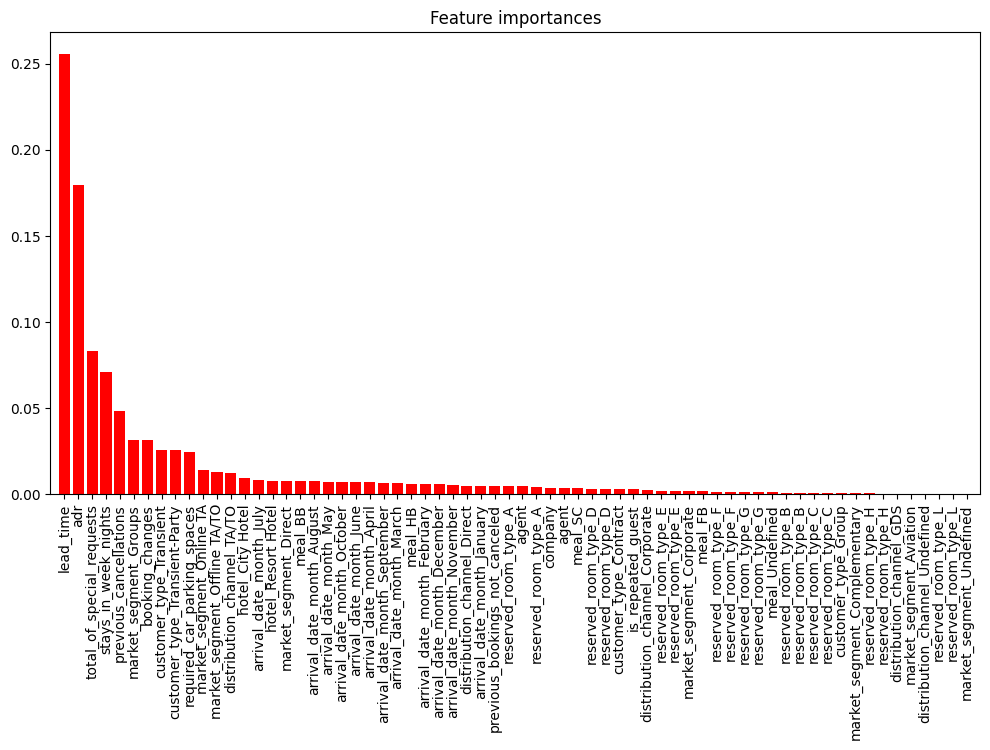

In [322]:
# fit RandomForrest model and print feature importance. Split to train and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

score = accuracy_score(y_test, preds)
print(f"Accuracy score: {round(score, 4)}")

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, preds)
print(f"F1 score: {round(f1, 4)}")

# plot feature importance -> sort features by importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
         color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.show()